## Лабораторная работа №3. Сысоев Александр РТ5-61Б

Задание:

    Выберите набор данных (датасет) для решения задачи классификации или регрессии.
    С использованием метода train_test_split разделите выборку на обучающую и тестовую.
    Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
    Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
    Сравните метрики качества исходной и оптимальной моделей.


## Импорт библиотек, чтение датасета и вывод основных параметров

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv', sep=",")

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data = data.dropna(subset=['bmi']).reset_index(drop=True)
data = data.drop('id', axis = 1)

## Кодирование категориальных признаков и масштабирование данных

In [5]:
data_temp = pd.get_dummies(data, drop_first = True)
data_temp.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
2,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
3,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0
4,81.0,0,0,186.21,29.0,1,1,0,1,0,1,0,0,1,1,0,0


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data_temp[['age', 'avg_glucose_level', 'bmi']])
sc1_data

array([[0.81689453, 0.80126489, 0.30126002],
       [0.97558594, 0.23451205, 0.25429553],
       [0.59716797, 0.53600776, 0.27605956],
       ...,
       [0.42626953, 0.12865848, 0.2325315 ],
       [0.62158203, 0.51320284, 0.17525773],
       [0.53613281, 0.13922999, 0.18213058]])

In [8]:
for i in range(0, 3):
    if i == 0:
        data_temp['age'] = pd.Series(sc1_data[:, i].tolist())
    elif i == 1:
        data_temp['avg_glucose_level'] = pd.Series(sc1_data[:, i].tolist())
    elif i == 2:
        data_temp['bmi'] = pd.Series(sc1_data[:, i].tolist())
data_temp.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.816895,0,1,0.801265,0.301260,1,1,0,1,0,1,0,0,1,1,0,0
1,0.975586,0,1,0.234512,0.254296,1,1,0,1,0,1,0,0,0,0,1,0
2,0.597168,0,0,0.536008,0.276060,1,0,0,1,0,1,0,0,1,0,0,1
3,0.963379,1,0,0.549349,0.156930,1,0,0,1,0,0,1,0,0,0,1,0
4,0.987793,0,0,0.605161,0.214204,1,1,0,1,0,1,0,0,1,1,0,0


## Разделение на обучающую и тестовую выборки

In [9]:
data_features = data_temp.drop('stroke', axis=1)
data_target = data_temp['stroke']

In [10]:
features_train, features_test, target_train, target_test = train_test_split(data_features, data_target, random_state = 1, test_size = 0.25)

In [11]:
print(features_train.shape)
print(features_test.shape)

(3681, 16)
(1228, 16)


In [12]:
print(target_train.shape)
print(target_test.shape)

(3681,)
(1228,)


## Обучение для произвольного К

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
KNeighborsClassifierObj = KNeighborsClassifier(n_neighbors=3)
KNeighborsClassifierObj

KNeighborsClassifier(n_neighbors=3)

In [15]:
KNeighborsClassifierObj.fit(features_train, target_train)
predictions_test = KNeighborsClassifierObj.predict(features_test)

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [17]:
accuracy_score(target_test, predictions_test), precision_score(target_test, predictions_test), recall_score(target_test, predictions_test), f1_score(target_test, predictions_test)

(0.9495114006514658, 0.16666666666666666, 0.017241379310344827, 0.03125)

In [18]:
confusion_matrix(target_test, predictions_test)

array([[1165,    5],
       [  57,    1]], dtype=int64)

## Подбор К с использованием GridSearchCV и кросс-валидации

In [19]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [20]:
n_range = np.array(range(5, 55, 5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [21]:
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv = 3, scoring = 'accuracy')
clf_gs.fit(data_features, data_target)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [22]:
clf_gs.cv_results_

{'mean_fit_time': array([0.00300511, 0.00531999, 0.00399033, 0.00299231, 0.0026594 ,
        0.00299199, 0.0036575 , 0.00232673, 0.00432134, 0.00299231]),
 'std_fit_time': array([8.30399517e-04, 9.40830554e-04, 8.15561630e-04, 5.94720425e-07,
        4.70415035e-04, 8.77806426e-07, 9.40268113e-04, 4.69516145e-04,
        9.40043491e-04, 4.49566384e-07]),
 'mean_score_time': array([0.16388098, 0.20212523, 0.18650063, 0.16056999, 0.18284416,
        0.17852203, 0.17486644, 0.19081489, 0.17553043, 0.1781985 ]),
 'std_score_time': array([0.00478471, 0.01175301, 0.00508501, 0.00325796, 0.00329001,
        0.01310384, 0.00690862, 0.01005791, 0.01525607, 0.00448548]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_ne

In [23]:
clf_gs.best_estimator_

KNeighborsClassifier(n_neighbors=10)

In [24]:
clf_gs.best_score_

0.9574251754581179

In [25]:
clf_gs.best_params_

{'n_neighbors': 10}

In [26]:
import matplotlib.pyplot as plt

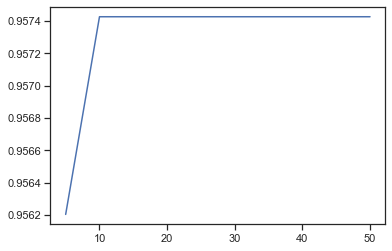

In [27]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

In [28]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=3), data_features, data_target, scoring = 'f1_weighted', cv = 3)
scores

array([0.93525181, 0.93208705, 0.93746124])

In [29]:
predictions_tuned_test = clf_gs.best_estimator_.predict(features_test)

In [30]:
accuracy_score(target_test, predictions_tuned_test)

0.9527687296416938